In [36]:
from scipy import ndimage
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def binary_racoon(image, threshold):
    img = image.copy()

    for i in range(len(img[:,1])):
        for j in range(len(img[1,:])): 
            img[i,j] = img[i,j] > threshold
    return img

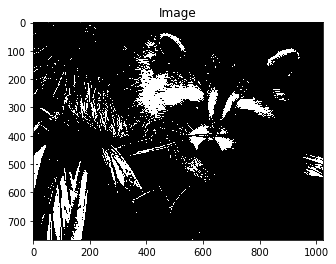

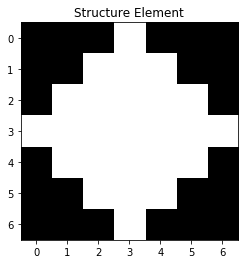

In [43]:
binary_image = binary_racoon(misc.face(gray=True), 185)
plt.imshow(binary_image, cmap=plt.cm.gray)
plt.title('Image')
plt.show()

struct = ndimage.generate_binary_structure(2, 1)
structure_element = ndimage.iterate_structure(struct, 3)
plt.imshow(structure_element, cmap=plt.cm.gray)
plt.title('Structure Element')
plt.show()

In [44]:
def create_image_skeleton(image, structure):
    S = []
    N = 0
    Y1 = image
    n = 0
    while True:
        Y2 = ndimage.binary_erosion(Y1, structure = structure)
        is_non_zero = False
        for line in Y2:
            if is_non_zero:
                break
            for value in line:
                if value != 0:
                    is_non_zero = True
                    break

        if is_non_zero is False:
            N = n
            S.append(Y1)
            break
        Y3 = ndimage.binary_dilation(Y2, structure = structure)
        S.append(Y1 ^ Y3)
        Y1 = Y2
        plt.imshow(Y1, cmap=plt.cm.gray)
        plt.show()
        n += 1
        print(n)
    return (Y1, N)

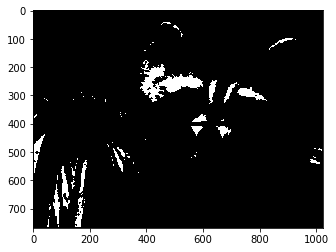

1


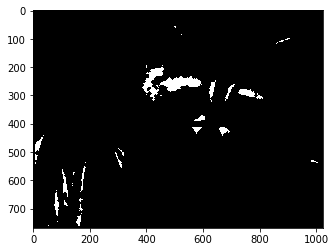

2


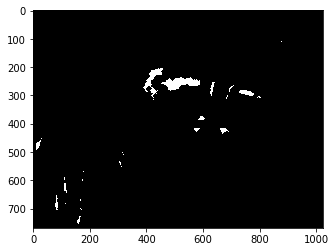

3


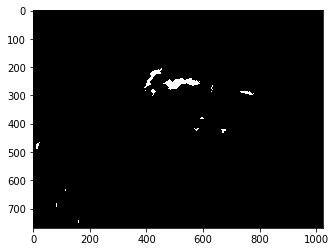

4


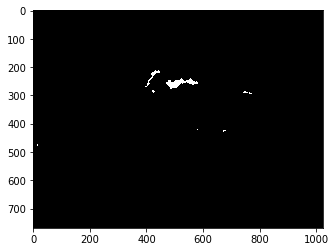

5


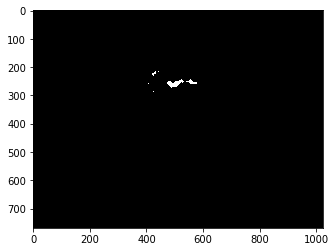

6


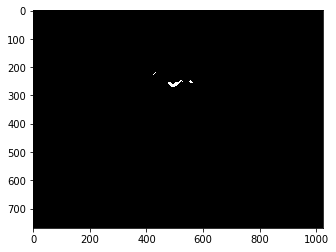

7


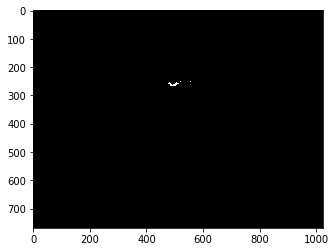

8


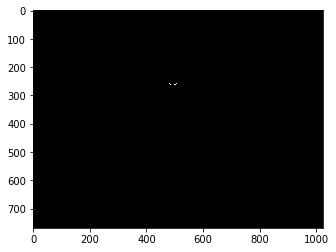

9


In [45]:
skeleton, n = create_image_skeleton(binary_image, structure_element)


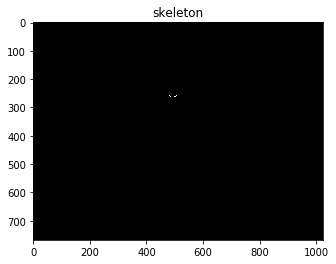

In [46]:
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.title('skeleton')
plt.show()